In [1]:
"""
Charles Silkin
EM and Spectral Clustering Project Code
FSU Interdisciplinary Data Science Master's Program - Applied Machine Learning Course
20 March 2023
"""

"\nCharles Silkin\nEM and Spectral Clustering Project Code\nFSU Interdisciplinary Data Science Master's Program - Applied Machine Learning Course\n20 March 2023\n"

In [2]:
# Import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import torch
import sklearn
from sklearn import datasets
from sklearn.metrics import DistanceMetric
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [3]:
# Load datasets:
x1 = np.loadtxt("x1.txt", delimiter = ",")
print(x1)
x2 = np.loadtxt("x2.txt", delimiter = ",")
print(x2)
pts = np.loadtxt("pts.txt", delimiter = ",")
print(pts)

[[ 1.4678    0.018859]
 [-0.12501   3.7121  ]
 [ 2.2979    0.15604 ]
 ...
 [ 0.33667   1.2233  ]
 [ 0.42864   3.3554  ]
 [-1.8377    2.8914  ]]
[[-3.8381  -1.5342 ]
 [-3.0944  -2.6304 ]
 [-6.4714  -1.0433 ]
 ...
 [ 1.9637  -0.91191]
 [-0.84794  0.25409]
 [-0.61393  6.2381 ]]
[[ 64.  40.]
 [ 40.  24.]
 [263.  38.]
 ...
 [ 61.  30.]
 [216. 165.]
 [167.  84.]]


In [4]:
# fit_kmeans function, implement K-Means:

def fit_kmeans(data_set, random_seed, num_clusters):
    ### Initialize X and y from data set
    # X,y = data_set
    
    ### Standardize data
    X = StandardScaler().fit_transform(data_set)
    
    ### Fit k-means on X
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=random_seed, 
                    n_init=1).fit(X)
    '''
    n_components = number of clusters
    random_state = random seed
    n_init = number of times algorithm iterates (once)
    '''
    
    ### Return predicted labels
    y_pred = kmeans.predict(X)
    
    return y_pred

In [5]:
# fit_em function, implement EM Algorithm:

def fit_em(data_set,random_seed,num_clusters):
    ### Standardize data
    X = StandardScaler().fit_transform(data_set)
    
    ### Fit GaussianMixture (EM algorithm) on X
    gmm = GaussianMixture(n_components = num_clusters,
                          init_params='kmeans',
                          random_state = random_seed,
                          n_init=1).fit(X)
    '''
    n_components = number of clusters
    init_params = "kmeans" --> Initial labels returned by K-means
    random_state = random seed (different from initial K-means)
    n_init = number of times algorithm iterates (once)
    '''
    
    ### Return predicted labels
    y_pred = gmm.predict(X)
    
    return y_pred

In [6]:
# fit_spectral_cluster algorithm, implement spectral clustering:

def fit_spectral_cluster(data_set, num_clusters):
    ### Standardize data
    X = StandardScaler().fit_transform(data_set)
    
    ### Fit Spectral Clustering on X
    spec = SpectralClustering(n_clusters = num_clusters,
                             random_state = 42,
                             n_init = 1).fit(X)
    '''
    n_components = number of clusters
    random_state = random seed (42 since same algorithm is being implemented)
    n_init = number of times algorithm iterates (once)
    '''
    
    ### Return predicted labels
    y_pred = spec.labels_
    
    return y_pred

In [7]:
# Initialize list of colors
pt_cols = list(mcolors.TABLEAU_COLORS.values())

c:\Users\newyo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\newyo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\newyo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\newyo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\newyo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Text(0.5, 1.0, 'Final K-Means Clusters for x1 Data Via EM Algorithm')

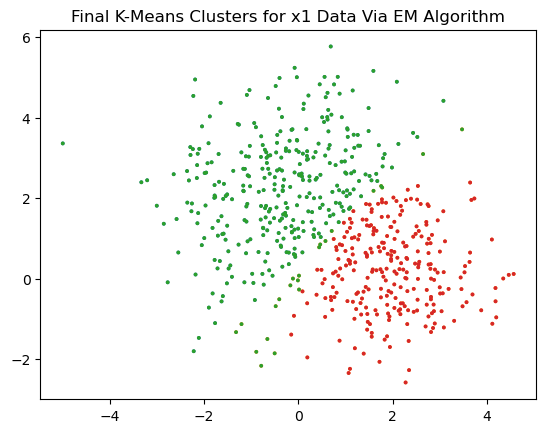

In [8]:
# PROBLEM 1.A:

## Obtain k-means result
kmeans_1a = fit_kmeans(x1,0,2)

### Plot of initial clusters
cols = [pt_cols[i] for i in kmeans_1a]
plt.scatter(x1[:,0],x1[:,1],s = 3, c = cols)
plt.title("Initial K-Means Clusters for x1 Data")

## Obtain EM result
gmm_1a = fit_em(x1,42,2)

### Make sure colors are different from initial K-means
cols = [pt_cols[j+2] for j in gmm_1a]

### Plot of final clusters
plt.scatter(x1[:,0],x1[:,1],s = 3, c = cols)
plt.title("Final K-Means Clusters for x1 Data Via EM Algorithm")

c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Final K-Means Clusters for x2 Data via EM Algorithm')

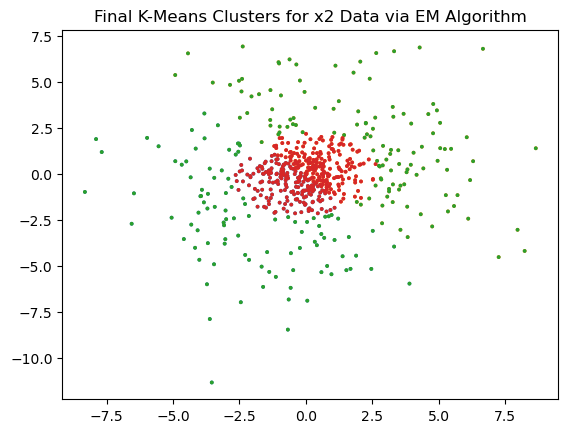

In [9]:
# PROBLEM 1.B:

## Obtain k-means result
kmeans_1b = fit_kmeans(x2,0,2)

### Plot of initial clusters
cols = [pt_cols[i] for i in kmeans_1b]
plt.scatter(x2[:,0],x2[:,1],s = 3, c = cols)
plt.title("Initial K-Means Clusters for x2 Data")

## Obtain EM result
gmm_1b = fit_em(x2,42,2)

### Make sure colors are different from initial K-means
cols = [pt_cols[j+2] for j in gmm_1b]

### Plot of final clusters
plt.scatter(x2[:,0],x2[:,1],s = 3, c = cols)
plt.title("Final K-Means Clusters for x2 Data via EM Algorithm")

c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Final K-Means Clusters for pts Data (3 Clusters) via EM Algorithm')

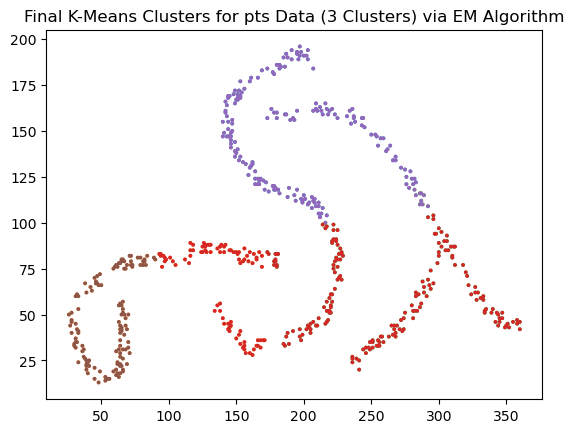

In [10]:
# PROBLEM 1.C:

## Obtain k-means result
kmeans_1c = fit_kmeans(pts,0,3)

### Plot of initial clusters
cols = [pt_cols[i] for i in kmeans_1c]
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.title("Initial K-Means Clusters for pts Data (3 Clusters)")

## Obtain EM result
gmm_1c = fit_em(pts,42,3)

### Make sure colors are different from initial K-means
cols = [pt_cols[j+3] for j in gmm_1c]

### Plot of final clusters
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.title("Final K-Means Clusters for pts Data (3 Clusters) via EM Algorithm")

c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Final K-Means Clusters for pts Data (10 Clusters) via EM Algorithm')

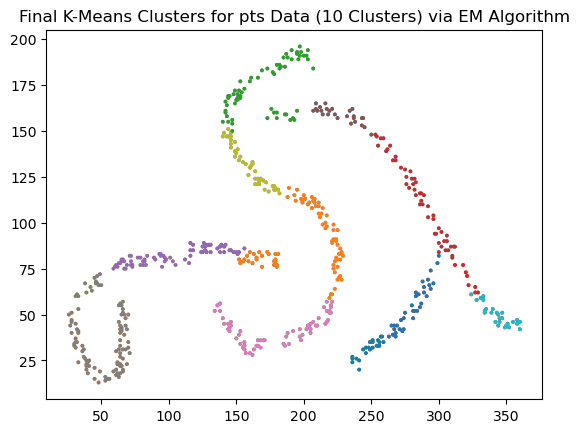

In [11]:
# PROBLEM 1.D:

## Obtain k-means result
kmeans_1d = fit_kmeans(pts,0,10)

### Plot of initial clusters
cols = [pt_cols[i] for i in kmeans_1d]
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.title("Initial K-Means Clusters for pts Data (10 Clusters)")

## Obtain EM result
gmm_1d = fit_em(pts,42,10)

### Make sure colors are different from initial K-means
#### Since 10 clusters, create reverse of initial colors list
cols_inv = []
for i in range(9,-1,-1):
    cols_inv.append(pt_cols[i])
cols = [cols_inv[j] for j in gmm_1d]

### Plot of final clusters
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.title("Final K-Means Clusters for pts Data (10 Clusters) via EM Algorithm")

c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Final Clusters for x1 Data Via Spectral Clustering')

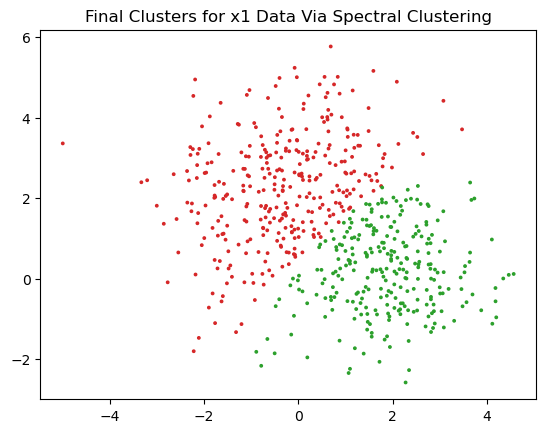

In [12]:
# PROBLEM 2.A (initial K-means already in PROBLEM 1.A code):

## Obtain spectral clustering result
spectral_2a = fit_spectral_cluster(x1,2)

### Make sure colors are different from initial K-means
cols = [pt_cols[j+2] for j in spectral_2a]

### Plot of spectral clustering clusters
plt.scatter(x1[:,0],x1[:,1],s = 3, c = cols)
plt.title("Final Clusters for x1 Data Via Spectral Clustering")

c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Final Clusters for x2 Data Via Spectral Clustering')

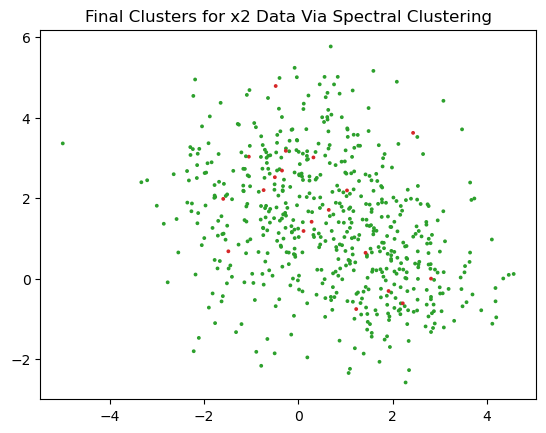

In [13]:
# PROBLEM 2.B (initial K-means already in PROBLEM 1.B code):

## Obtain spectral clustering result
spectral_2b = fit_spectral_cluster(x2,2)

### Make sure colors are different from initial K-means
cols = [pt_cols[j+2] for j in spectral_2b]

### Plot of spectral clustering clusters
plt.scatter(x1[:,0],x1[:,1],s = 3, c = cols)
plt.title("Final Clusters for x2 Data Via Spectral Clustering")

c:\Users\newyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0.5, 1.0, 'Final Clusters for pts Data (3 Clusters) via Spectral Clustering')

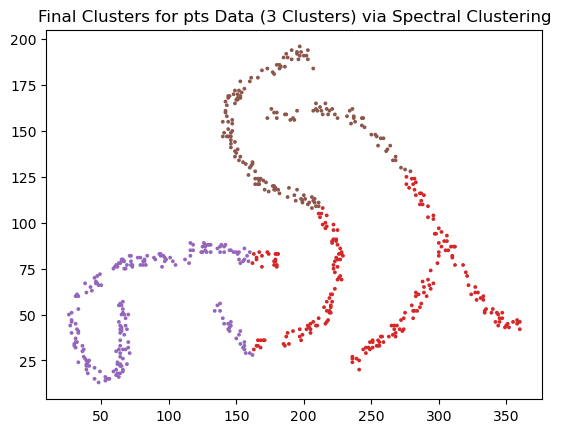

In [14]:
# PROBLEM 2.C (initial K-means already in PROBLEM 1.C code):

## Obtain spectral clustering result
spectral_2c = fit_spectral_cluster(pts,3)

### Make sure colors are different from initial K-means
cols = [pt_cols[j+3] for j in spectral_2c]

### Plot of spectral clustering clusters
plt.scatter(pts[:,0],pts[:,1],s = 3, c = cols)
plt.title("Final Clusters for pts Data (3 Clusters) via Spectral Clustering")